In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import connection as con
from etl import extract as ex

In [3]:
conn_taller_dw = con.connect_taller_dw()

In [4]:
df_dimension_vehiculo = ex.extract_table("dimension_vehiculo", conn_taller_dw)
df_echo_orden_de_trabajo = ex.extract_table("echo_orden_de_trabajo", conn_taller_dw)
df_dimension_mano_de_obra = ex.extract_table("dimension_mano_de_obra", conn_taller_dw)
df_dimension_materiales = ex.extract_table("dimension_materiales", conn_taller_dw)

In [34]:
df_ordenes_vehiculos = pd.merge(df_echo_orden_de_trabajo, df_dimension_vehiculo, on = 'idvehiculo', how='left')
df_ordenes_vehiculos_agrupado = df_ordenes_vehiculos.groupby(['marca']).size().reset_index()
df_ordenes_vehiculos_agrupado = df_ordenes_vehiculos_agrupado.rename(columns = {0 : 'conteo'}) 
df_ordenes_vehiculos_agrupado = df_ordenes_vehiculos_agrupado.sort_values(by='conteo',ascending=False)

/tmp/ipykernel_1710/1356127626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='marca', y='conteo', data=df_ordenes_vehiculos_agrupado, palette='viridis')


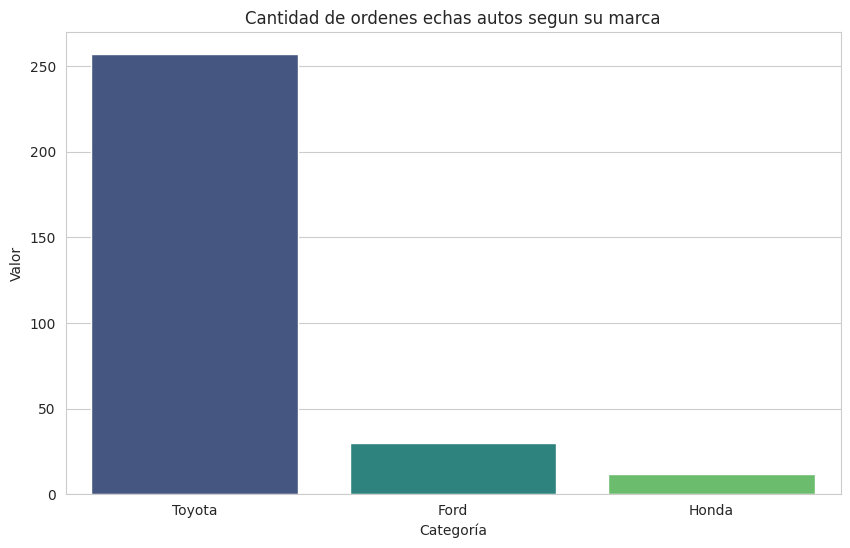

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='marca', y='conteo', data=df_ordenes_vehiculos_agrupado, palette='viridis')
plt.title('Cantidad de ordenes echas autos segun su marca')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.show()

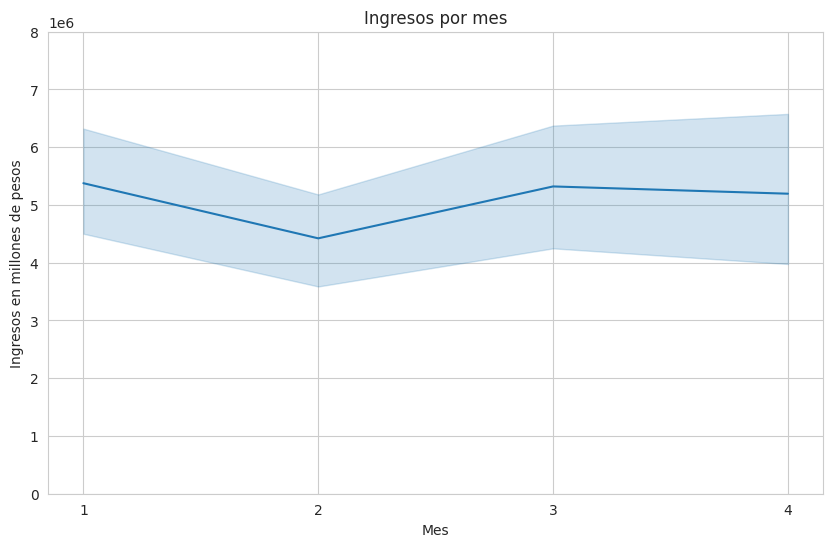

In [27]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x='mes_fecha_creacion', y='costo_total', data=df_echo_orden_de_trabajo)

plt.ylim(0, 8000000)
plt.title('Ingresos por mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos en millones de pesos')
plt.xticks(range(1, df_echo_orden_de_trabajo['mes_fecha_creacion'].max() + 1))
plt.show()

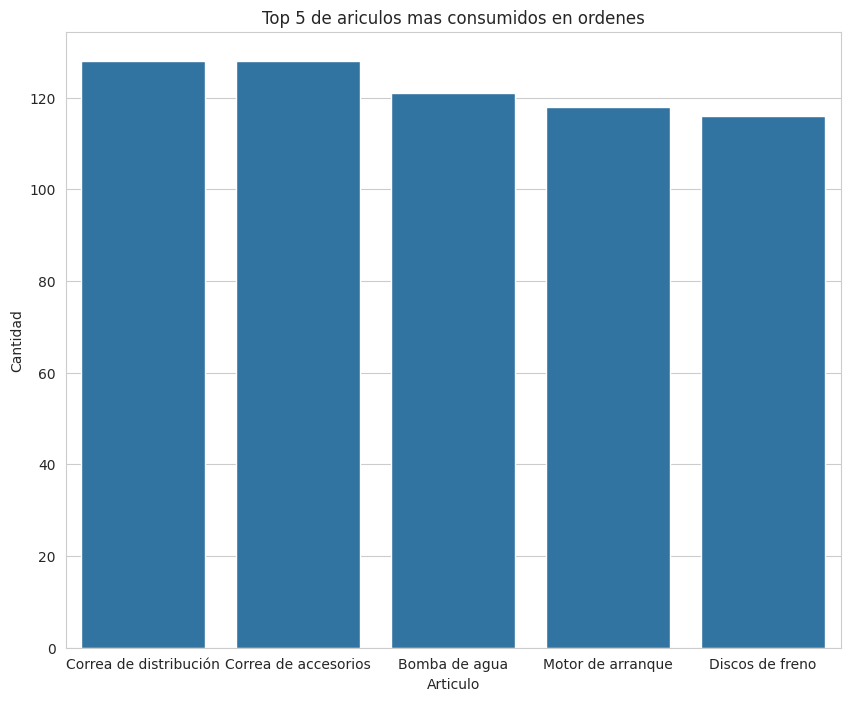

In [45]:
df_dimension_materiales['cantidad'] = df_dimension_materiales['cantidad'].astype(int)
df_parte = df_dimension_materiales[['descripcion_articulo','cantidad']]
df_parte = df_parte.groupby('descripcion_articulo').sum()['cantidad'].reset_index()
df_parte = df_parte.sort_values(by='cantidad',ascending=False)
df_parte = df_parte.head(5)
plt.figure(figsize=(10, 8))
sns.barplot(df_parte,x = 'descripcion_articulo',y = 'cantidad')
plt.xlabel('Articulo')
plt.ylabel('Cantidad')
plt.title('Top 5 de ariculos mas consumidos en ordenes')
plt.show()

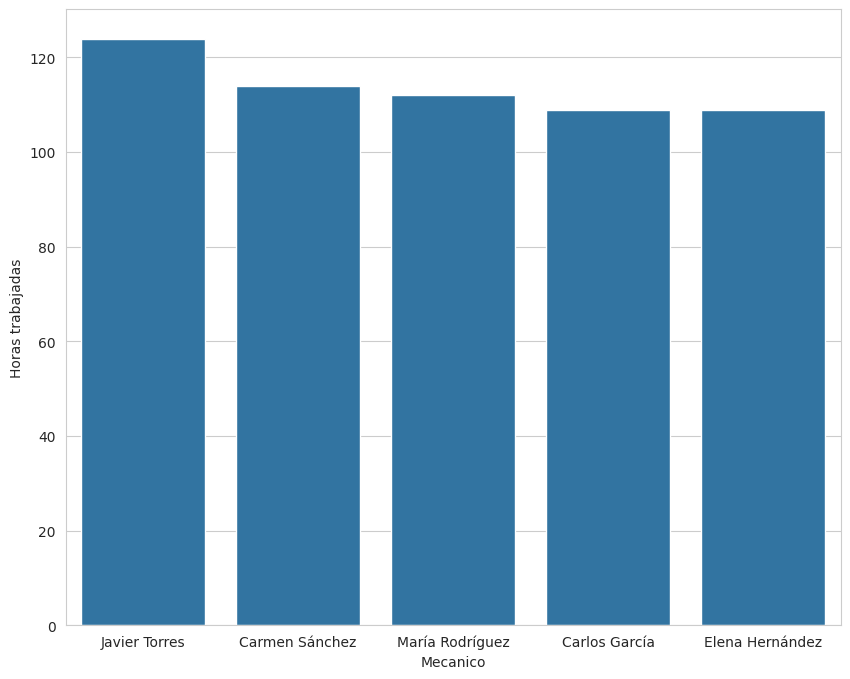

In [40]:
df_mano_obra = df_dimension_mano_de_obra[['nombre_completo','horas_trabajadas']]
df_mano_obra = df_mano_obra.groupby('nombre_completo').sum()['horas_trabajadas'].reset_index()
df_mano_obra = df_mano_obra.sort_values(by='horas_trabajadas',ascending=False)
df_mano_obra = df_mano_obra.head(5)
plt.figure(figsize=(10, 8))
sns.barplot(df_mano_obra,x = 'nombre_completo',y = 'horas_trabajadas')
plt.xlabel('Mecanico')
plt.ylabel('Horas trabajadas')
plt.title('Top 5 de mecanicos con mas horas trabajadas')
plt.show()